In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lime import lime_tabular

import pickle

In [2]:
data_train = pd.read_csv("../data/alt_maccsfp_after_preprocessing.csv")

y = data_train['ALT']
del data_train['ALT']
X = data_train.values
features = data_train.columns.values
y = y.values

cv_outer = KFold(n_splits=5, shuffle=True, random_state=234)

models = []
best_predicted_explanations = []
worst_predicted_explanations = []

folder_path = "../best_model_analysis"

In [45]:
def draw_actual_vs_predicted_plot(folder_path, number, y_test, y_pred_test, result):
    x = np.arange(start=0, stop=len(y_test), step=1)
    y_test = np.expm1(y_test)
    y_pred_test = np.expm1(y_pred_test)
    fontsize = 15
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_test, 'go', label="ALT", c = "tab:blue")
    plt.plot(x, y_pred_test, 'bD', label="ALT - predicted", c = "tab:orange")
    plt.title(f"PREDICTED VS ACTUAL", fontsize=fontsize)
    plt.suptitle("R2 = {:.3f}".format(result), fontsize=fontsize)
    plt.xlabel("SAMPLE NUMBER", fontsize=fontsize)
    plt.ylabel("ALT  VALUE", fontsize=fontsize)
    plt.legend(loc="best", fontsize=fontsize)
    plt.xticks(range(0, 20))
    plt.yticks(range(0, 300, 25))
    plt.grid()
    plt.savefig(f'{folder_path}/actual_vs_predicted_{number}.jpg')
    plt.show()
    
    
def draw_actual_vs_predicted_parity_plot(folder_path, number, y_test, y_pred, result, text):
    x = np.arange(start=0, stop=len(y_test), step=1)
    y_test = np.expm1(y_test)
    y_pred = np.expm1(y_pred)
    fontsize = 15
    plt.figure(figsize=(8, 8))
    plt.plot(y_test, y_pred, 'bD', label="ALT - predicted", c = "tab:orange")
    plt.plot(y_test, y_test, 'k-', label="ALT - predicted", c = "tab:blue")
    plt.title(f"PREDICTED VS ACTUAL", fontsize=fontsize)
    plt.suptitle(f" {text} \n R2 ACCURACY = {result}  ", fontsize=fontsize)
    plt.xlabel("ALT VALUE", fontsize=fontsize)
    plt.ylabel("PREDICTED ALT VALUE", fontsize=fontsize)
    plt.savefig(f'{folder_path}/parity_plot_{text}_actual_vs_predicted_{number}.jpg')
    plt.show()


def model_explanation(folder_path, number, model, x_train, x_test, y_test, y_pred_test, features):
    """
    Function generates html reports using LIME framework (https://github.com/marcotcr/lime)
    for best and worst prediction
    """
    sorted_absolute_error_idx = np.argsort(np.absolute(np.subtract(y_test, y_pred_test)))
    explainer = lime_tabular.LimeTabularExplainer(x_train, mode="regression",
                                                  feature_names=features)
    explanation_best_predicted = explainer.explain_instance(x_test[sorted_absolute_error_idx[0]],
                                                            model.predict,
                                                            num_features=len(features))

    explanation_worst_predicted = explainer.explain_instance(
        x_test[sorted_absolute_error_idx[::-1][0]], model.predict,
        num_features=len(features))
    explanation_best_predicted.save_to_file(
        f"{folder_path}/explanation_best_prediction_{number}.html")
    explanation_worst_predicted.save_to_file(
        f"{folder_path}/explanation_worst_prediction_{number}.html")

    return explanation_best_predicted.as_list(), explanation_worst_predicted.as_list()

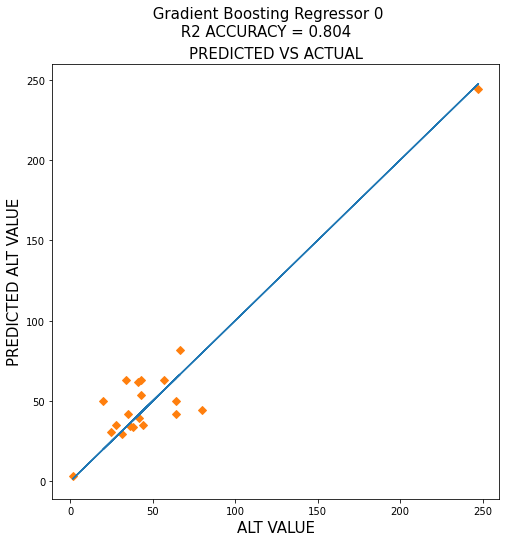

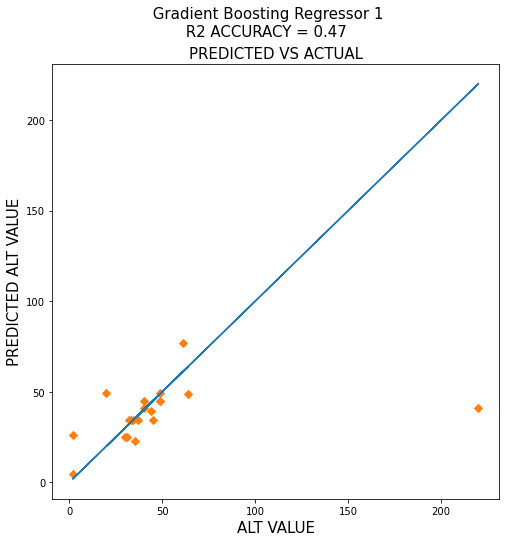

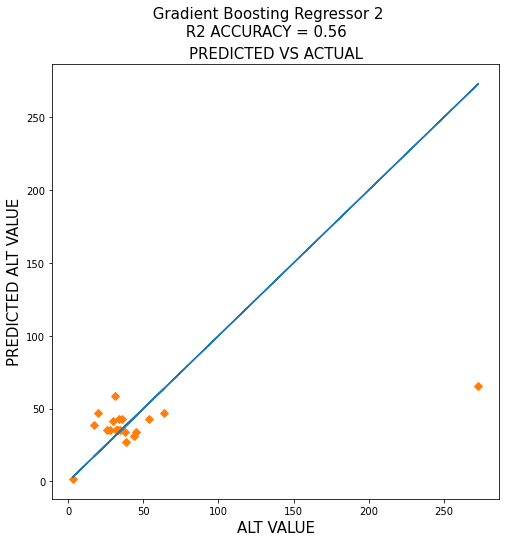

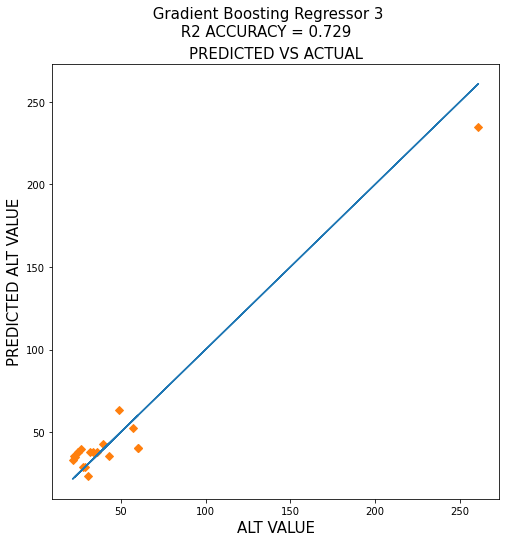

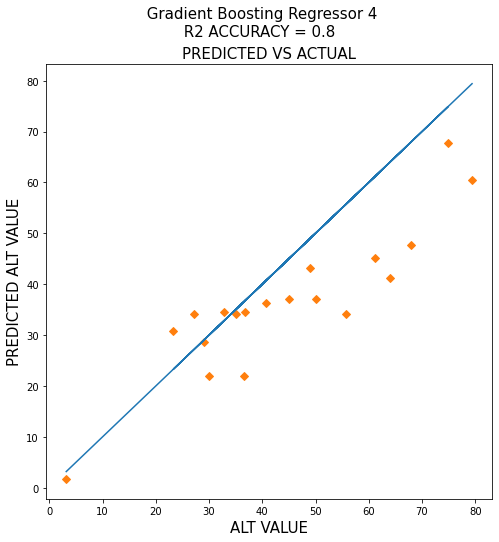

In [46]:
for i, (train_index, test_index) in enumerate(cv_outer.split(X)):
    # split data
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     loaded_model = pickle.load(
#         open(f"../models/finalized_GradienBoostingRegressor_model_{i}.pickle", 'rb'))
    loaded_model = pickle.load(
        open(f"../models/finalized_RandomForestRegressor_model_{i}.pickle", 'rb'))
    models.append(loaded_model)
    y_pred_test = loaded_model.predict(x_test)
    y_pred_train = loaded_model.predict(x_train)
    result = round(loaded_model.score(x_test, y_test), 3)
    result_train = round(loaded_model.score(x_train, y_train), 3)
#     draw_actual_vs_predicted_plot(folder_path, i, y_test, y_pred_test, result)
#     draw_actual_vs_predicted_parity_plot(folder_path, i, y_test, y_pred_test, result, f"Random Forest Regressor ")
#     draw_actual_vs_predicted_parity_plot(folder_path, i, y_test, y_pred_test, result, f"Gradien Boosting Regressor ")
#     draw_actual_vs_predicted_parity_plot(folder_path, i, y_train, y_pred_train, result_train, "train")
#     exp_best_pred, exp_worst_pred = model_explanation(folder_path, i, loaded_model, x_train, x_test,
#                                                       y_test, y_pred_test, features)
#     best_predicted_explanations.append(exp_best_pred)
#     worst_predicted_explanations.append(exp_worst_pred)


In [9]:
best_predicted_explanations

[[('MACCSFP81 <= 0.00', 0.28908570689273555),
  ('MACCSFP46 <= 0.00', -0.2551897576933682),
  ('MACCSFP88 <= 0.00', 0.2105575566371479),
  ('MACCSFP47 <= 0.00', 0.17792125793794802),
  ('MACCSFP36 <= 0.00', 0.1384945735137291),
  ('0.00 < MACCSFP144 <= 1.00', -0.11418126202780149),
  ('MACCSFP26 <= 0.00', -0.10400214001870006),
  ('MACCSFP50 <= 0.00', -0.08356540282963958),
  ('MACCSFP123 <= 0.00', -0.07619807439827801),
  ('0.00 < MACCSFP117 <= 1.00', -0.07132025065125562),
  ('MACCSFP42 <= 0.00', -0.06798982535947527),
  ('MACCSFP139 <= 0.00', -0.06591774887593677),
  ('0.00 < MACCSFP92 <= 1.00', -0.06247936832662672),
  ('MACCSFP23 <= 0.00', -0.055323648067701105),
  ('MACCSFP75 <= 0.00', 0.053558975617228825),
  ('0.00 < MACCSFP160 <= 1.00', -0.05051366729220861),
  ('0.00 < MACCSFP98 <= 1.00', -0.05004651815649309),
  ('MACCSFP97 <= 0.00', -0.04886397164485131),
  ('MACCSFP76 <= 0.00', 0.04590091341856103),
  ('MACCSFP38 <= 0.00', 0.04327131186544676),
  ('MACCSFP84 <= 0.00', -0.0

In [10]:
worst_predicted_explanations

[[('MACCSFP81 <= 0.00', 0.30674628548129645),
  ('MACCSFP46 <= 0.00', -0.24612115550793306),
  ('MACCSFP88 <= 0.00', 0.20829152166388126),
  ('MACCSFP47 <= 0.00', 0.17283959053399708),
  ('MACCSFP36 <= 0.00', 0.1416735015192391),
  ('0.00 < MACCSFP144 <= 1.00', -0.1208897316186277),
  ('MACCSFP26 <= 0.00', -0.11603391319328825),
  ('MACCSFP50 <= 0.00', -0.07388644611089563),
  ('MACCSFP139 <= 0.00', -0.0729821523988136),
  ('0.00 < MACCSFP117 <= 1.00', -0.07220604686916088),
  ('MACCSFP123 <= 0.00', -0.07219798136579739),
  ('MACCSFP42 <= 0.00', -0.06786811848002881),
  ('MACCSFP23 <= 0.00', -0.06294367292076955),
  ('0.00 < MACCSFP92 <= 1.00', -0.058002871085421695),
  ('MACCSFP160 <= 0.00', 0.053724516715521795),
  ('0.00 < MACCSFP75 <= 1.00', -0.052979927776040436),
  ('MACCSFP76 <= 0.00', 0.0528338978141147),
  ('MACCSFP98 <= 0.00', 0.052787683469551795),
  ('MACCSFP38 <= 0.00', 0.048678820729771526),
  ('MACCSFP84 <= 0.00', -0.04571119552902459),
  ('MACCSFP97 <= 0.00', -0.0431240

In [46]:
insignificant_fingerprint_bits = set([el[0] for l in best_predicted_explanations + worst_predicted_explanations for el in l if el[1] == 0.0])
insignificant_fingerprint_bits

{'MACCSFP100 <= 1.00',
 'MACCSFP104 <= 1.00',
 'MACCSFP111 <= 1.00',
 'MACCSFP121 <= 1.00',
 'MACCSFP129 <= 1.00',
 'MACCSFP133 <= 1.00',
 'MACCSFP137 <= 1.00',
 'MACCSFP138 <= 1.00',
 'MACCSFP142 <= 1.00',
 'MACCSFP145 <= 1.00',
 'MACCSFP150 <= 1.00',
 'MACCSFP151 <= 1.00',
 'MACCSFP153 <= 1.00',
 'MACCSFP156 <= 1.00',
 'MACCSFP158 <= 1.00',
 'MACCSFP161 <= 1.00',
 'MACCSFP162 <= 1.00',
 'MACCSFP163 <= 1.00',
 'MACCSFP164 <= 1.00',
 'MACCSFP165 <= 1.00',
 'MACCSFP29 <= 0.00',
 'MACCSFP30 <= 0.00',
 'MACCSFP34 <= 0.00',
 'MACCSFP52 <= 0.00',
 'MACCSFP66 <= 0.00'}

In [44]:
significant_fingerprint_bits = set([el[0] for l in best_predicted_explanations + worst_predicted_explanations for el in l[:10]])
significant_fingerprint_bits

{'0.00 < MACCSFP110 <= 1.00',
 '0.00 < MACCSFP117 <= 1.00',
 '0.00 < MACCSFP144 <= 1.00',
 '0.00 < MACCSFP79 <= 1.00',
 '0.00 < MACCSFP97 <= 1.00',
 'MACCSFP110 <= 0.00',
 'MACCSFP117 <= 0.00',
 'MACCSFP123 <= 0.00',
 'MACCSFP139 <= 0.00',
 'MACCSFP139 > 0.00',
 'MACCSFP144 <= 0.00',
 'MACCSFP26 <= 0.00',
 'MACCSFP29 > 0.00',
 'MACCSFP30 > 0.00',
 'MACCSFP36 <= 0.00',
 'MACCSFP36 > 0.00',
 'MACCSFP45 <= 0.00',
 'MACCSFP46 <= 0.00',
 'MACCSFP47 <= 0.00',
 'MACCSFP47 > 0.00',
 'MACCSFP50 <= 0.00',
 'MACCSFP79 <= 0.00',
 'MACCSFP81 <= 0.00',
 'MACCSFP81 > 0.00',
 'MACCSFP88 <= 0.00',
 'MACCSFP88 > 0.00',
 'MACCSFP89 <= 0.00',
 'MACCSFP97 <= 0.00'}

In [56]:
min_len = min(len(significant_fingerprint_bits), len(insignificant_fingerprint_bits))

results = pd.DataFrame({
    'significant_fingerprint_bits': [*list(significant_fingerprint_bits)[:min_len]],
   'insignificant_fingerprint_bits': [*list(insignificant_fingerprint_bits)[:min_len]]})


results.to_csv(f"../best_model_analysis/significant_and_insignificant_fingerprints.csv", index=False)
results

,significant_fingerprint_bits,insignificant_fingerprint_bits
0,MACCSFP45 <= 0.00,MACCSFP142 <= 1.00
1,MACCSFP144 <= 0.00,MACCSFP156 <= 1.00
2,MACCSFP97 <= 0.00,MACCSFP145 <= 1.00
3,0.00 < MACCSFP144 <= 1.00,MACCSFP150 <= 1.00
4,MACCSFP88 <= 0.00,MACCSFP29 <= 0.00
5,0.00 < MACCSFP97 <= 1.00,MACCSFP121 <= 1.00
6,MACCSFP81 <= 0.00,MACCSFP52 <= 0.00
7,MACCSFP30 > 0.00,MACCSFP165 <= 1.00
8,MACCSFP79 <= 0.00,MACCSFP66 <= 0.00
9,0.00 < MACCSFP110 <= 1.00,MACCSFP163 <= 1.00
